In [4]:
import tensorflow as tf ## pip install tensorflow

Loading - "MNIST Data Set"
Containing Training Samples = 60,000; Testing Samples= 10,000
TensorFlow already contain MNIST data swt which dan be loaded using keras

In [5]:
mnist = tf.keras.datasets.mnist ## this is basically handwritten characters based on 28 * 28 sized of images of 0 to 9

After loading the MNIST data, Divide into Train and Test datasets

In [6]:
## unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
import matplotlib.pyplot ## pip install matplotlib

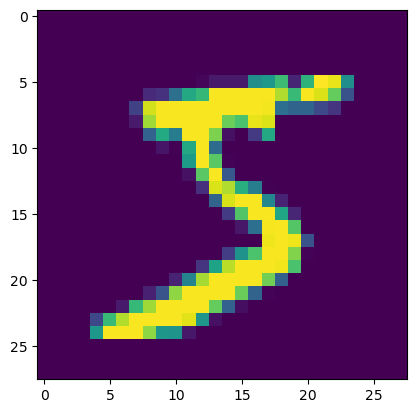

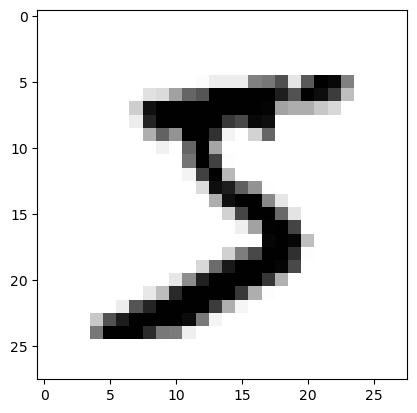

In [9]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() ## in order to execute the graph
## however we don't know whether its color image or binary images
## so in order to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

Checking the values of each pixel before Normalization

In [10]:
print (x_train[0]) ## before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As images are in Grey level (1 channel => 0 to 255), not Colored (RGB)
Normalizing the data | Pre-Precessing Step

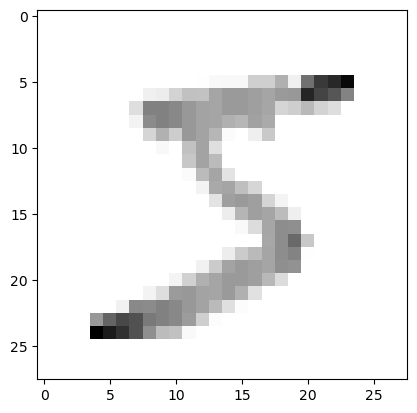

In [11]:
## it's gray image and all values from 0 to 255
## in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

After Normaliztion


In [12]:
print(x_train[0]) ## Normalized value

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print (y_train[0]) ## just to check that we have labels inside our network

5


Resizing image to make it suitabble for apply Convolution operation


In [14]:
import numpy as np ## pip install numpy
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel=filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel operation
print ("Training Samples dimension", x_trainr.shape)
print ("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


Creating a Deep Neural Network
Training on 60,000 samples of MNIST Handwritten dataset

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [18]:
## Creating a neural network
model = Sequential ()

## 1st Convolution Layer 0 1 2 3 (60,000 28, 28, 1) 28-3+1=26*26
model.add (Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) ## only for 1st comvolution layer to mention input layer size
model.add(Activation("relu")) ## Activation function to make it non-linear, < 0 remove, > 0
model.add(MaxPooling2D(pool_size=(2,2))) ## Max Pooling maximum value of 2 * 2

## 2nd Convolution layer
model.add(Conv2D(64,(3,3))) ## 2nd Convolution layer
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

## 3rd Convolution layer
model.add(Conv2D(64, (3,3))) ## 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Fully Connected layer # 1  20*20=400
model.add (Flatten()) ## before using fully connected layer, need to be flatten so that 2D to 1D
model.add (Dense(64))
model.add(Activation("relu"))

## fully connected layer # 2  
model.add (Dense(32))
model.add(Activation("relu"))

## last fully connected layer, output must be equal to number of classes, 10 (0-9)
model.add (Dense(10)) ## last dense layer must be equal to 10
model.add(Activation("softmax")) ## activation function is changed to softmax (Class probabilities)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000
